# Центральная предельная теорема своими руками

Для начала, импортируем библиотеки, которые понадобятся нам для работы:

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt,factorial
%matplotlib inline

В качестве любимого распределения возьму экспоненциальное распределение с $\lambda$=1.5. Экспоненциальное распределение задается с помощью плотности $f(x)=\lambda*exp(-\lambda*x)$. С помощью данного распределения часто моделируют время между двумя последовательными свершениями одного и того же события. Параметр $\lambda$ часто называют интенсивностью или обратным коэффициентом масштраба.

In [259]:
exp=sts.expon(scale=1.5)

Сгенерируем выборку объема 1000 из него:

In [260]:
sample=exp.rvs(1000)

Построим гистограмму выборки и нарисуем поверх неё теоритическую плотность.

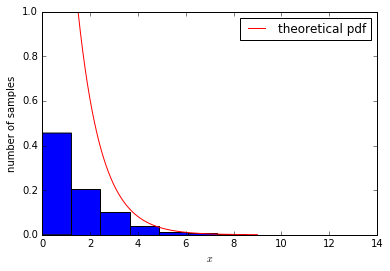

In [261]:
plt.hist(sample,normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
x=np.linspace(1.5,9,1000)
pdf=expon.pdf(x)
plt.plot(x,pdf,'r-',label='theoretical pdf')
plt.legend()

Сгенерируем 1000 выборок объемом 5,10,50 

In [262]:
x1=[exp.rvs(5).mean() for i in xrange(1000)]
x2=[exp.rvs(10).mean() for i in xrange(1000)]
x3=[exp.rvs(50).mean() for i in xrange(1000)]

Построим гистограмму выборочного среднего для выборки объёма 5 и апроксимируем его нормальным распределением

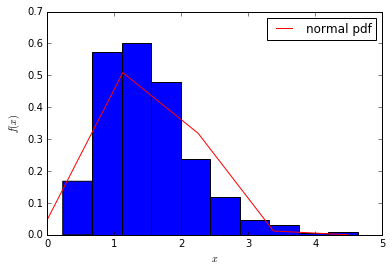

In [272]:
plt.hist(x1,normed=True)
norm1=sts.norm(exp.mean(),sqrt(exp.var()/5.))
xn1=np.linspace(0,4.5,5)
pdfn1=norm1.pdf(xn1)
plt.plot(xn1,pdfn1,'r-',label="normal pdf")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

Как можно увидеть выше на графике, нормальное распределение пока не очень точно описывает распределение выборочных средних. Теперь построим гистограмму выборочного среднего для выборки объема 10.

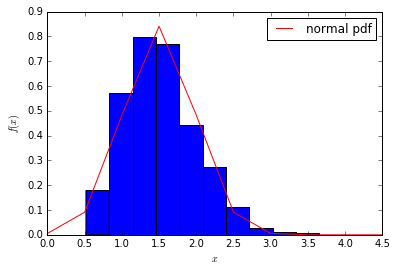

In [273]:
plt.hist(x2,normed=True)
norm2=sts.norm(exp.mean(),sqrt(exp.var()/10.))
xn2=np.linspace(0,4.5,10)
pdfn2=norm2.pdf(xn2)
plt.plot(xn2,pdfn2,'r-',label='normal pdf')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

Как можно увидеть, с ростом n точность аппроксимации увеличивается. Построим гистограмму выборочного среднего для выборки объемом 50 и убедимся в этом.

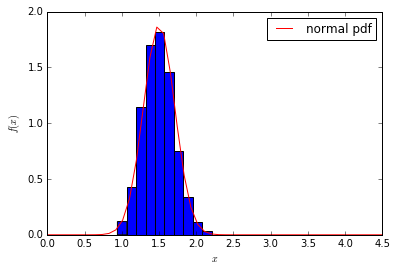

In [274]:
plt.hist(x3,normed=True)
xn3=np.linspace(0,4.5,50)
norm3=sts.norm(exp.mean(),sqrt(exp.var()/50.))
pdfn3=norm3.pdf(xn3)
plt.plot(xn3,pdfn3,'r-',label='normal pdf')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

Как можно увидеть, плотность нормального распределения с n=50 достаточно точно аппроксимирует распределение выборочных средних даже для величины, распределенной экспоненциально.